In [62]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')


In [63]:
df=pd.read_csv('covidcountry.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [64]:
df.shape

(23688, 5)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [66]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [67]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [68]:
last_date=df[df.Date =='2020-5-26']

In [69]:
max_confirmed_cases=last_date.sort_values(by='Confirmed',ascending=False)

In [70]:
max_confirmed_cases

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23523,2020-05-26,Brazil,391222,158593,24512
23640,2020-05-26,Russia,362342,131129,3807
23678,2020-05-26,United Kingdom,266599,1161,37130
23658,2020-05-26,Spain,236259,150376,27117
...,...,...,...,...,...
23661,2020-05-26,Suriname,11,9,1
23604,2020-05-26,MS Zaandam,9,0,2
23684,2020-05-26,Western Sahara,9,6,1
23632,2020-05-26,Papua New Guinea,8,8,0


In [71]:
max_confirmed_cases.head()

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23523,2020-05-26,Brazil,391222,158593,24512
23640,2020-05-26,Russia,362342,131129,3807
23678,2020-05-26,United Kingdom,266599,1161,37130
23658,2020-05-26,Spain,236259,150376,27117


In [72]:
max_death=last_date.sort_values(by='Deaths',ascending=False)
max_death.head()

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23678,2020-05-26,United Kingdom,266599,1161,37130
23585,2020-05-26,Italy,230555,144658,32955
23562,2020-05-26,France,182847,65997,28533
23658,2020-05-26,Spain,236259,150376,27117


In [73]:
max_recovered=last_date.sort_values(by='Recovered',ascending=False)
max_recovered.head()

,Date,Country,Confirmed,Recovered,Deaths
23674,2020-05-26,US,1680913,384902,98913
23566,2020-05-26,Germany,181200,161967,8372
23523,2020-05-26,Brazil,391222,158593,24512
23658,2020-05-26,Spain,236259,150376,27117
23585,2020-05-26,Italy,230555,144658,32955


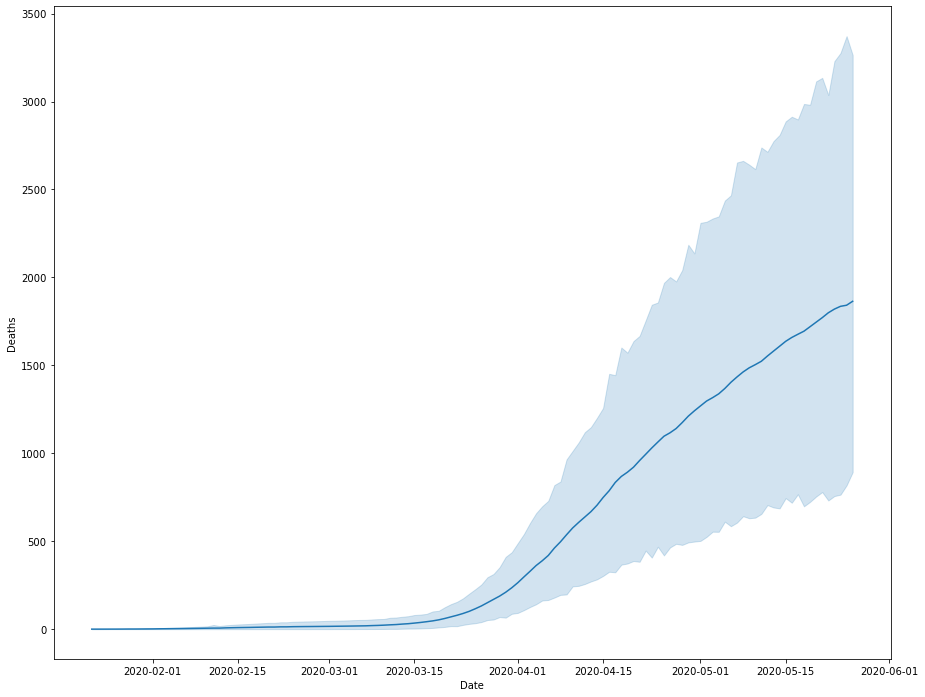

In [74]:
plt.figure(figsize=(15,12))
sns.lineplot(x=df['Date'],y=df['Deaths'])

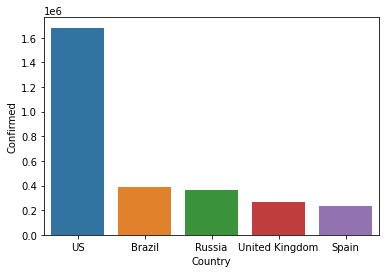

In [78]:
sns.barplot(x='Country',y='Confirmed',data=max_confirmed_cases.head())
plt.show()

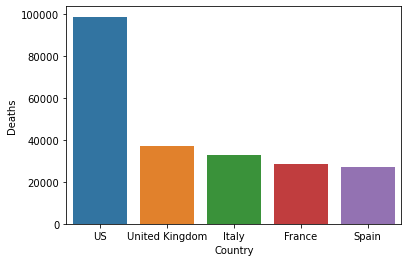

In [79]:
sns.barplot(x='Country',y='Deaths',data=max_death.head())

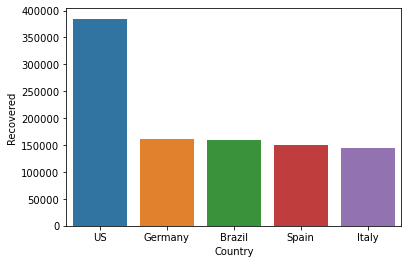

In [80]:
sns.barplot(x='Country',y='Recovered',data=max_recovered.head())

In [81]:
df1=pd.DataFrame()
df1['month']=df['Date'].dt.month_name()
df1['year']=df['Date'].dt.year
df1['day']=df['Date'].dt.day_name()
df1['Confirmed']=df['Confirmed']
df1['Recovered']=df['Recovered']
df1['death']=df['Deaths']
df1['Country']=df['Country']
df1

,month,year,day,Confirmed,Recovered,death,Country
0,January,2020,Wednesday,0,0,0,Afghanistan
1,January,2020,Wednesday,0,0,0,Albania
2,January,2020,Wednesday,0,0,0,Algeria
3,January,2020,Wednesday,0,0,0,Andorra
4,January,2020,Wednesday,0,0,0,Angola
...,...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3,West Bank and Gaza
23684,May,2020,Tuesday,9,6,1,Western Sahara
23685,May,2020,Tuesday,249,10,49,Yemen
23686,May,2020,Tuesday,920,336,7,Zambia


In [82]:
df1['year'].drop_duplicates()

0    2020
Name: year, dtype: int64

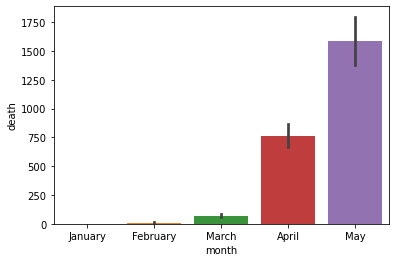

In [83]:
sns.barplot(x='month',y='death',data=df1)

In [ ]:
#from above we find that suddenly no. of deaths rises after march  & afterwards

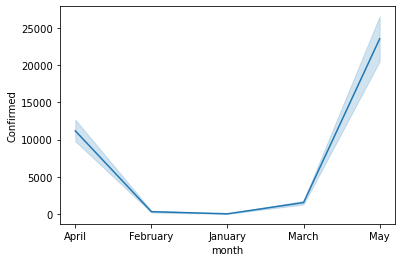

In [84]:
sns.lineplot(x='month',y='Confirmed',data=df1)

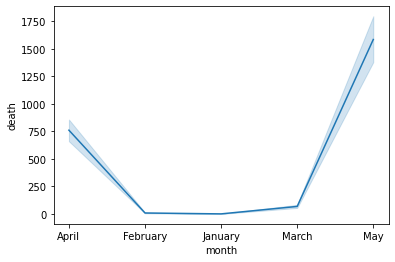

In [85]:
sns.lineplot(x='month',y='death',data=df1)

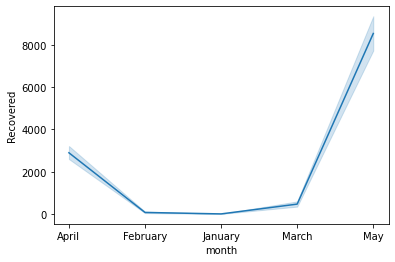

In [86]:
sns.lineplot(x='month',y='Recovered',data=df1)

In [87]:
df_india=df1[df1['Country']=='India']
df_india

,month,year,day,Confirmed,Recovered,death,Country
79,January,2020,Wednesday,0,0,0,India
267,January,2020,Thursday,0,0,0,India
455,January,2020,Friday,0,0,0,India
643,January,2020,Saturday,0,0,0,India
831,January,2020,Sunday,0,0,0,India
...,...,...,...,...,...,...,...
22827,May,2020,Friday,124794,51824,3726,India
23015,May,2020,Saturday,131423,54385,3868,India
23203,May,2020,Sunday,138536,57692,4024,India
23391,May,2020,Monday,144950,60706,4172,India


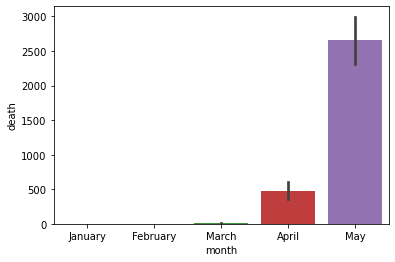

In [88]:
sns.barplot(x='month',y='death',data=df_india)

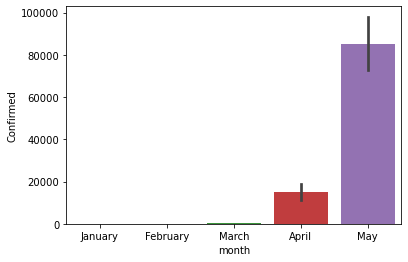

In [89]:
sns.barplot(x='month',y='Confirmed',data=df_india)

In [90]:
x=df1.drop(columns=['day','year','Country','death'],axis=1)
x.head()

,month,Confirmed,Recovered
0,January,0,0
1,January,0,0
2,January,0,0
3,January,0,0
4,January,0,0


In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['month']=le.fit_transform(x['month'])

In [92]:
x.shape

(23688, 3)

In [93]:
y=df['Deaths']
y.shape

(23688,)

In [94]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (18950, 3)
x_test_shape: (4738, 3)
y_train_shape: (18950,)
y_test_shape: (4738,)


In [95]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    r2_scr=r2_score(y_test,lg_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)

max r2 score corresponding to  96 is 0.9244070296373161


In [96]:
#lets use cross validation to check overfiting or underfitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([-1.7347467 ,  0.02864827,  0.66167946,  0.83844649,  0.87336784])

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=96,test_size=.20)
lg.fit(x_train,y_train)
lg_pred=lg.predict(x_test)
lg_pred

array([3.76207424e+00, 2.54435017e+00, 5.39090890e+01, ...,
       3.66542926e+00, 2.04906470e+03, 9.02460365e-01])

In [98]:
print("RMSE :", np.sqrt(mean_squared_error(y_test,lg_pred)))

print("r2_score :",r2_score(y_test,lg_pred))

RMSE : 1351.8568016319143
r2_score : 0.9244070296373161


In [99]:
from sklearn.ensemble import AdaBoostRegressor

abr= AdaBoostRegressor(n_estimators = 100)
abr.fit(x_train, y_train)

abrpred = abr.predict(x_test)


mse = mean_squared_error(y_test, abrpred)
print("RMSE :", np.sqrt(mse))

print("Result :",abr.score(x_train, y_train))

RMSE : 1043.7427340467748
Result : 0.9247772855712194


In [100]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)


rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))

0.9874975702723167
302255.62522609974
84.33342775212522


In [101]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)

print(r2_score(y_test,ad_pred))
print(mean_absolute_error(y_test,ad_pred))

0.9436380552158463
245.9990248555504


In [102]:
#saving the best model

import joblib

joblib.dump(predrf,'predrffile.obj')

['predrffile.obj']